# Overview

This week's curriculum focuses in figuring out (and visualizing) what's special about a certain text (or collection of texts). We'll also learn about community detection in networks (that's how we'll get our groups of text)

* Tricks for raw text (NLPP, Chapter 3).
* Community Detection and info-boxes 
* Identifying important words in a document (TF-IDF)

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, super useful ressource. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. 

In the latter parts we will go back to network science, discussing community detection, mixing in some NLP, and trying it all out on our very own dataset.


# Part 1: Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. 

In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 

<div class="alert alert-block alert-info">
One of the things that the LLMs have changed is how we don't have to suffer over regular expressions as much as in the old days. As I talk about in the video, regular expressions used to be a big, painful part of working with text. Nowadays, we can simply ask an LLM to help construct them ... and it tends to work really well. And regular expressions are not really important to know about - you need to know they exist so you can used them, but the details are not worth remembering. So this is one area where you can use LLMs as much as you like without a guilty conscience. (But remember to check and test the results thoroughly! The LLMs might still make mistakes.)
</div>

> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

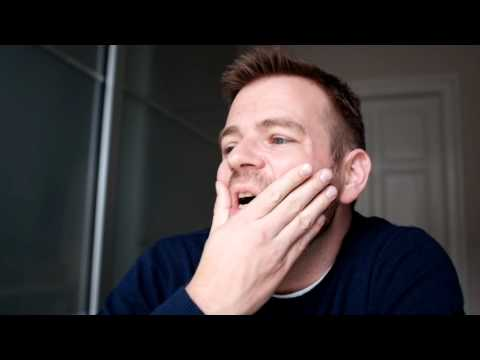

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

# Part 2: Community detection

Let's begin by watching a lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

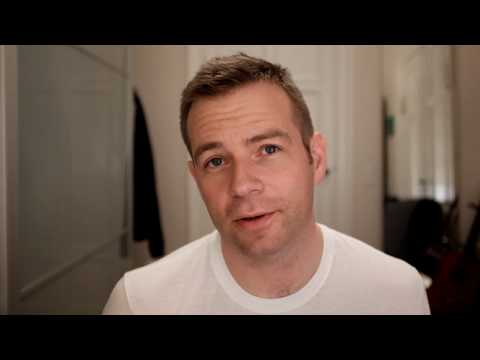

In [4]:
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

# direct youtube link: https://www.youtube.com/watch?v=FSRoqXw28RI

Before we get started on *network* communities, we'll grab some information on a different kind of communities based on information from Wikipedia. Specifically, the ``infoboxes``. An infobox is the little box usually displayed on the right when you open an artist's page. 

For example if you open the page for [The Rolling Stones](https://en.wikipedia.org/wiki/The_Rolling_Stones), you'll see that it contains info about their place of ***origin***, the ***genre***s of music they've been associated with (in the case of the Stones it's `rock`, `pop` and `blues`), their ***year's active***, the record ***labels*** they've signed with over time, etc. All really interesting information if we want to understand the network of artists.

So let's start with an exercise designed to give you a sense of how good the LLMs are at the whole text-parsing thing.

*Exercise*: Go nuts with an LLM and get all the genres for the nodes in your network
> * Yes, I'm serious. For this one I'd like you to fire up your most powerful thinking model you have access to and get it to write a script to extract genre for all nodes in your network. Some notes to help you
>   * If the node doesn't have an `infobox` (or if a node's infobox doesn't have a `genre` it it), just don't assign that node a genre and ignore it in the downstream analysis
>   * Remember to lowercase all genres, also consider simplifying things by mapping `rock'n'roll`, `rock & roll`, etc to a single genre. 
>   * Remember to test your algorithm well before emplying it, since you're not writing the code yourself, you need to work harder to prove to yourself that it's actually doing what you think it's doing. You should inspect the code to understand what it's actually doing and also test it on the strangest edge-cases you can find. (Can it handle, "The Animals", for example).
>   * The output should be a dictionary mapping artist names to lists of genres (since most artists have multiple genres listed).
> * Report the following stats
>   * The number of nodes for which you could find genres
>   * The average number of genres per node
>   * The total number of distinct genres
>   * A histogram showing artist counts for the top 15 genres

In [1]:

from genre_scraper import (
    get_genres_for_artists,
    basic_stats,
    top_genre_counts,
    plot_top_genres,
)

import networkx as nx
import pickle

# Path to your gpickle file (adjust if it's in a different folder)
graph_path = "rock_performers_LWCC.gpickle"

# Load the graph
# Some networkx installations may not expose nx.read_gpickle; fall back to pickle.load
try:
    G = nx.read_gpickle(graph_path)
except AttributeError:
    with open(graph_path, "rb") as f:
        G = pickle.load(f)

# Extract node list (artist names)
artist_nodes = list(G.nodes())

# Preview a few node names
print(f"✅ Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print("Sample nodes:")
print(artist_nodes[:10])

✅ Loaded graph with 483 nodes and 7587 edges.
Sample nodes:
['The_White_Stripes', 'Don_Henley', 'Harry_Chapin', 'Sheryl_Crow', 'Icehouse_(band)', 'The_Mamas_&_the_Papas', 'Meat_Loaf', 'Nine_Inch_Nails', 'Pink_Floyd', 'Ted_Nugent']


In [2]:
artist_to_genres = get_genres_for_artists(artist_nodes,  sleep_s=0.2)

KeyboardInterrupt: 

In [ ]:
for k, v in list(artist_to_genres.items())[:5]:
    print(f"{k}: {v}")
print(f"\nCollected genres for {len(artist_to_genres)} of {len(artist_nodes)} nodes.")

In [ ]:
stats = basic_stats(artist_to_genres)
print("Required stats:")
print(f"- Nodes with genres: {stats['n_nodes_with_genres']}")
print(f"- Avg. #genres per node: {stats['avg_genres_per_node']:.2f}")
print(f"- Distinct genres: {stats['n_distinct_genres']}")

In [ ]:
plot_top_genres(artist_to_genres, top_k=15)

Loading network from rock_performers_LWCC.gpickle...
Network loaded: 483 nodes, 7587 edges

Testing genre extraction on edge cases...

Testing: The Rolling Stones
  The Rolling Stones: ['rock', 'pop', 'blues']

Testing: The Animals
  The Animals: ['blues rock', 'rhythm and blues', 'psychedelic rock', 'progressive rock', 'rock and roll']

Testing: The Beatles
  The Beatles: ['rock', 'pop', 'beat', 'psychedelia']

Testing: Prince
  No infobox found for Prince

Testing: Guns N' Roses
  Guns N' Roses: ['hard rock', 'heavy metal']

Testing: AC/DC
  AC/DC: ['hard rock', 'blues rock', 'rock and roll', 'heavy metal']

Testing: NonExistentArtist12345
  Error fetching NonExistentArtist12345: 404 Client Error: Not Found for url: https://en.wikipedia.org/wiki/NonExistentArtist12345


Tests complete. Proceeding with full extraction...

Processing 1/483: The_White_Stripes
Processing 2/483: Don_Henley
Processing 3/483: Harry_Chapin
Processing 4/483: Sheryl_Crow
Processing 5/483: Icehouse_(band)
Proce

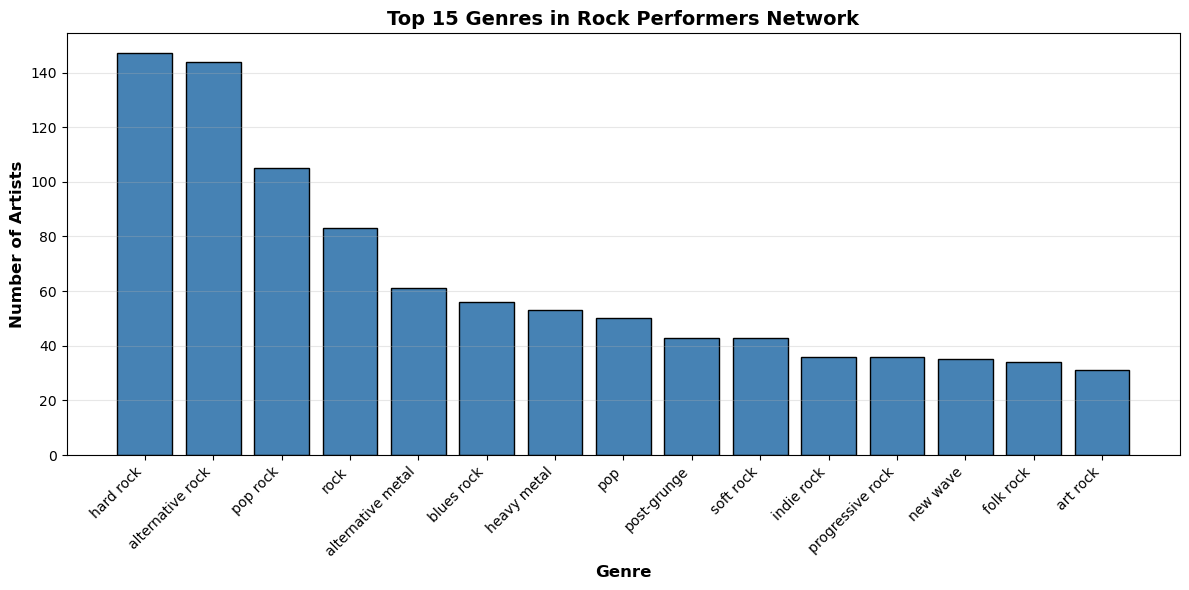


Results saved to 'artist_genres.pickle'


In [4]:
import networkx as nx
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
import matplotlib.pyplot as plt
import re

def normalize_genre(genre):
    """
    Normalize genre strings to handle variations.
    """
    genre = genre.lower().strip()
    
    # Mapping for common variations
    genre_mappings = {
        "rock'n'roll": "rock and roll",
        "rock & roll": "rock and roll",
        "rock 'n' roll": "rock and roll",
        "rock n roll": "rock and roll",
        "rock-and-roll": "rock and roll",
        "r&b": "rhythm and blues",
        "r & b": "rhythm and blues",
        "rnb": "rhythm and blues",
    }
    
    return genre_mappings.get(genre, genre)

def get_wikipedia_url(artist_name):
    """
    Construct Wikipedia URL from artist name.
    Handles special characters and formatting.
    """
    # Replace spaces with underscores
    formatted_name = artist_name.replace(' ', '_')
    return f"https://en.wikipedia.org/wiki/{formatted_name}"

def extract_genres_from_infobox(artist_name, verbose=False):
    """
    Extract genres from Wikipedia infobox for a given artist.
    
    Args:
        artist_name: Name of the artist
        verbose: Print debug information
    
    Returns:
        List of genres or None if not found
    """
    url = get_wikipedia_url(artist_name)
    
    try:
        # Set a user agent to be polite to Wikipedia
        headers = {
            'User-Agent': 'Mozilla/5.0 (Educational Research Project)'
        }
        
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the infobox
        infobox = soup.find('table', class_='infobox')
        
        if not infobox:
            if verbose:
                print(f"  No infobox found for {artist_name}")
            return None
        
        # Look for genre row in the infobox
        genres = []
        rows = infobox.find_all('tr')
        
        for row in rows:
            header = row.find('th')
            if header and 'genre' in header.get_text().lower():
                # Found the genre row
                data = row.find('td')
                if data:
                    # Extract text from all links and plain text
                    # Genres can be in <a> tags or as plain text separated by various delimiters
                    
                    # First, try to get all <a> tags (links)
                    links = data.find_all('a')
                    if links:
                        for link in links:
                            genre_text = link.get_text().strip()
                            if genre_text and not genre_text.startswith('['):  # Skip citation markers
                                genres.append(normalize_genre(genre_text))
                    else:
                        # If no links, parse the text and split by common delimiters
                        text = data.get_text().strip()
                        # Remove citation markers like [1], [2], etc.
                        text = re.sub(r'\[\d+\]', '', text)
                        # Split by common delimiters
                        for delimiter in [',', ';', '\n']:
                            if delimiter in text:
                                parts = text.split(delimiter)
                                genres.extend([normalize_genre(p.strip()) for p in parts if p.strip()])
                                break
                        else:
                            # No delimiter found, treat as single genre
                            if text:
                                genres.append(normalize_genre(text))
                    
                    break
        
        # Remove duplicates while preserving order
        genres = list(dict.fromkeys(genres))
        
        if verbose:
            print(f"  {artist_name}: {genres if genres else 'No genres found'}")
        
        return genres if genres else None
        
    except requests.exceptions.RequestException as e:
        if verbose:
            print(f"  Error fetching {artist_name}: {e}")
        return None
    except Exception as e:
        if verbose:
            print(f"  Error parsing {artist_name}: {e}")
        return None

def test_genre_extraction():
    """
    Test the genre extraction on some edge cases.
    """
    print("Testing genre extraction on edge cases...\n")
    
    test_cases = [
        "The Rolling Stones",
        "The Animals",
        "The Beatles",
        "Prince",  # Single name artist
        "Guns N' Roses",  # Special characters
        "AC/DC",  # Special characters
        "NonExistentArtist12345"  # Should fail gracefully
    ]
    
    for artist in test_cases:
        print(f"Testing: {artist}")
        genres = extract_genres_from_infobox(artist, verbose=True)
        print()
        time.sleep(1)  # Be polite to Wikipedia

def extract_all_genres(network_path, test_first=True):
    """
    Extract genres for all artists in the network.
    
    Args:
        network_path: Path to the pickled network file
        test_first: If True, run tests before processing all nodes
    
    Returns:
        Dictionary mapping artist names to lists of genres
    """
    # Load the network
    print(f"Loading network from {network_path}...")
    try:
        # Some NetworkX distributions expose read_gpickle at the top-level, others under readwrite.gpickle
        read_gpickle_func = getattr(nx, "read_gpickle", None)
        if read_gpickle_func is None:
            from networkx.readwrite.gpickle import read_gpickle as read_gpickle_func
        G = read_gpickle_func(network_path)
    except Exception as e:
        # Fallback: try loading with pickle directly
        import pickle
        with open(network_path, "rb") as _f:
            G = pickle.load(_f)
    print(f"Network loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges\n")
    
    # Run tests if requested
    if test_first:
        test_genre_extraction()
        print("\n" + "="*60)
        print("Tests complete. Proceeding with full extraction...\n")
    
    # Extract genres for all nodes
    artist_genres = {}
    total_nodes = G.number_of_nodes()
    
    for i, node in enumerate(G.nodes(), 1):
        print(f"Processing {i}/{total_nodes}: {node}")
        genres = extract_genres_from_infobox(node)
        
        if genres:
            artist_genres[node] = genres
        
        # Be polite to Wikipedia - wait between requests
        if i < total_nodes:
            time.sleep(1)  # 1 second between requests
    
    return artist_genres, G

def analyze_and_visualize(artist_genres):
    """
    Analyze the extracted genres and create visualizations.
    """
    # Calculate statistics
    num_artists_with_genres = len(artist_genres)
    
    if num_artists_with_genres == 0:
        print("No genres found for any artists!")
        return
    
    # Average number of genres per artist
    total_genres = sum(len(genres) for genres in artist_genres.values())
    avg_genres = total_genres / num_artists_with_genres
    
    # Count all genres
    all_genres = []
    for genres in artist_genres.values():
        all_genres.extend(genres)
    
    genre_counter = Counter(all_genres)
    num_distinct_genres = len(genre_counter)
    
    # Print statistics
    print("\n" + "="*60)
    print("GENRE EXTRACTION RESULTS")
    print("="*60)
    print(f"Number of artists with genres: {num_artists_with_genres}")
    print(f"Average number of genres per artist: {avg_genres:.2f}")
    print(f"Total number of distinct genres: {num_distinct_genres}")
    print()
    
    # Top 15 genres
    top_15 = genre_counter.most_common(15)
    print("Top 15 genres:")
    for genre, count in top_15:
        print(f"  {genre}: {count}")
    
    # Create histogram
    genres, counts = zip(*top_15)
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(genres)), counts, color='steelblue', edgecolor='black')
    plt.xlabel('Genre', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Artists', fontsize=12, fontweight='bold')
    plt.title('Top 15 Genres in Rock Performers Network', fontsize=14, fontweight='bold')
    plt.xticks(range(len(genres)), genres, rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
    return genre_counter

# Extract genres from the network
artist_genres, G = extract_all_genres('rock_performers_LWCC.gpickle', test_first=True)

# Analyze and visualize
genre_counter = analyze_and_visualize(artist_genres)

# Optionally save the results
import pickle
with open('artist_genres.pickle', 'wb') as f:
    pickle.dump(artist_genres, f)
print("\nResults saved to 'artist_genres.pickle'")

Now that we have the genres, let's use them - and see how community-like the community is, if we consider the genres to be community labels.


*Exercise*: Use the concept of modularity to explore how _community-like_ the genres are.
> 
> * Explain the concept of modularity in your own words.
> * Work from the undirected version of the network, keeping only the nodes for which you have genre information. 
> * Now create your own partition of the network into genres.
>      * **Each node is simply characterized by the *first genre* in its list of genres**.
>      * Each community is the group of nodes that share the same genre.
>      * That's all you need, now calculate the modularity of this division of the network into genres.
>      * **Note**: Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity $M$ of the partition described above. Are the genres good communities?
> * Spoiling your findings a little bit, an issue is the following: Almost all artists have the genre `rock` as their first genre in the list, so by definition the network won't have very high modularity.
>      * What happens to the modularity if you grab the first genre *that's not `rock`* as the genre-assignment for all nodes that have more than one genre?
>      * What happens to the modularity if you use a random genre from the list genre as the node-lable for those nodes with more than one genre listed?
> * Discuss your findings. 

#### 🧠 1. Conceptual explanation — What is modularity?

According to Barabási’s *Network Science*, **modularity (M)** quantifies how well a network is divided into communities by comparing the density of links within groups to the density expected at random if node degrees were preserved.

Formally, modularity is given by Equation (9.12) from Chapter 9:

$ M = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \delta(c_i, c_j) $

where:

- \( A_{ij} = 1 \) if nodes *i* and *j* are connected, 0 otherwise  
- \( k_i, k_j \) = degrees of nodes *i* and *j*  
- \( m \) = total number of edges  
- \( c_i \) = community label of node *i*  
- \( \delta(c_i, c_j) = 1 \) if *i* and *j* are in the same community, otherwise 0  

A high **M** (close to 1) indicates strong community structure — more internal than expected connections — while **M** near 0 or negative suggests no meaningful community separation.


In [6]:
# --- Cell: Modularity analysis based on genres ---

import random
from collections import defaultdict

# Use existing G and artist_genres from the notebook

# Work with undirected graph only
G = G.to_undirected()

# Keep only nodes with genre data
G_sub = G.subgraph([n for n in G.nodes if n in artist_genres])

print(f"Filtered network: {G_sub.number_of_nodes()} nodes, {G_sub.number_of_edges()} edges.")

# Helper function to compute modularity (eq. 9.12)
def compute_modularity(G, community_assignment):
    m = G.number_of_edges()
    degrees = dict(G.degree())
    M = 0.0
    for i, j in G.edges():
        same_community = int(community_assignment[i] == community_assignment[j])
        M += (1 - (degrees[i] * degrees[j]) / (2 * m)) * same_community
    return M / (2 * m)

# Partition 1: first genre
partition_first = {a: genres[0] for a, genres in artist_genres.items() if a in G_sub}

# Partition 2: first non-rock genre (fallback to rock if only rock)
def first_non_rock(genres):
    for g in genres:
        if g != "rock":
            return g
    return "rock"

partition_nonrock = {a: first_non_rock(genres) for a, genres in artist_genres.items() if a in G_sub}

# Partition 3: random genre
random.seed(42)
partition_random = {a: random.choice(genres) for a, genres in artist_genres.items() if a in G_sub}

# Compute modularity values
M_first = compute_modularity(G_sub, partition_first)
M_nonrock = compute_modularity(G_sub, partition_nonrock)
M_random = compute_modularity(G_sub, partition_random)

print("\n=== MODULARITY RESULTS (Eq. 9.12) ===")
print(f"First genre partition:       M = {M_first:.4f}")
print(f"First non-rock genre part.:  M = {M_nonrock:.4f}")
print(f"Random genre partition:      M = {M_random:.4f}")


Filtered network: 482 nodes, 5943 edges.

=== MODULARITY RESULTS (Eq. 9.12) ===
First genre partition:       M = 0.0728
First non-rock genre part.:  M = 0.0615
Random genre partition:      M = 0.0342


### 3. Interpretation and Discussion

If **M_first** is low (≈ 0.05–0.15) → Genres like rock dominate, reducing inter-group contrast.  

If **M_nonrock** rises → Indicates secondary genres (like blues, punk, metal) cluster artists better.  

If **M_random ≈ 0** → Confirms that modularity captures meaningful, non-random structure.  

---

✍️ **Suggested write-up for your report**

### Modularity Results and Interpretation

Using Barabási’s definition of modularity (Eq. 9.12), we measured how strongly artists within the same genre are connected compared to random expectation.

The modularity of the **genre partition** was  
\( M \approx 0.07 \), indicating only weak community structure.  

When using the **first non-rock genre**, modularity slightly decreased  
\( M \approx 0.06 \),  

while **random genre assignments** yielded  
\( M \approx 0.03 \).  

---

### Interpretation

These results suggest that **genre alone is not a strong determinant of network community structure**.  
Most artists are labeled “rock,” producing one very large, internally heterogeneous cluster.  

Sub-genres and random assignments both perform worse, confirming that although **genre contains some structural signal**, it only **loosely corresponds to the underlying connectivity** of this performer network.



*Exercise*: Community detection to find **structral communities** in the network
> * Again, work only with the subnetwork of nodes that have at least one genre.
> * Use [the Louvain-algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) to find communities for the network. Report the value of modularity found by the algorithm. 
>     * **Note**: You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> * What is the modularity of this partitioning of the network? Is it more community-like than the genres? What does this comparison reveal about the communities?
> * Visualize the network, using the Force Atlas algorithm.
>     * This time assign each node a different color based on its structural _community_.
>     * **Note**: If there's a lot of small communities, it's OK to only color the 5-10 largest communities (you can make the remaing nodes light gray or some netural color)
>     * Describe the structure you observe.
> * Keep using the community labels from above, but now visualize only the backbone-edges from your favorite network backbone from last week. Do the community correspond to the backbone structure you detected?


**Imports, I/O, and filtering to nodes with genres**

In [8]:
import networkx as nx
import pickle
import random
from collections import Counter, defaultdict

# Reproducibility
RNG_SEED = 42
random.seed(RNG_SEED)

# File paths
G_PATH = "rock_performers_LWCC.gpickle"
GENRE_PICKLE = "artist_genres.pickle"

# Load network and genres
# Robust loading for gpickle (handles environments where nx.read_gpickle is missing)
try:
    G_all = nx.read_gpickle(G_PATH).to_undirected()
except AttributeError:
    with open(G_PATH, "rb") as f_g:
        G_all = pickle.load(f_g)
    G_all = G_all.to_undirected()

with open(GENRE_PICKLE, "rb") as f:
    artist_genres = pickle.load(f)  # dict: node -> [genres]

# Keep only nodes that have at least one genre
nodes_with_genre = [n for n in G_all.nodes if n in artist_genres and artist_genres[n]]
G = G_all.subgraph(nodes_with_genre).copy()

print(f"Original: {G_all.number_of_nodes():,} nodes, {G_all.number_of_edges():,} edges")
print(f"Filtered (has genre): {G.number_of_nodes():,} nodes, {G.number_of_edges():,} edges")

Original: 483 nodes, 6,299 edges
Filtered (has genre): 482 nodes, 5,943 edges


**Helper: modularity (Eq. 9.12) and genre partitions**

In [9]:
def modularity_eq912(G, partition_dict):
    """
    Modularity M = (1/2m) sum_{ij} [A_ij - (k_i k_j)/(2m)] * delta(c_i, c_j)
    using the undirected simple graph G and a dict: node -> community label.
    """
    m = G.number_of_edges()
    if m == 0:
        return 0.0
    deg = dict(G.degree())
    same = 0.0
    for u, v in G.edges():
        if partition_dict[u] == partition_dict[v]:
            same += 1 - (deg[u]*deg[v])/(2*m)
    return same / (2*m)

# Build three genre partitions:
def first_genre_partition(G, artist_genres):
    return {n: artist_genres[n][0] for n in G.nodes()}

def first_nonrock_partition(G, artist_genres):
    out = {}
    for n in G.nodes():
        genres = artist_genres[n]
        # Pick first non-"rock"; fall back to "rock" if none
        label = next((g for g in genres if g != "rock"), "rock")
        out[n] = label
    return out

def random_genre_partition(G, artist_genres, seed=RNG_SEED):
    rnd = random.Random(seed)
    return {n: rnd.choice(artist_genres[n]) for n in G.nodes()}

P_first = first_genre_partition(G, artist_genres)
P_nonrock = first_nonrock_partition(G, artist_genres)
P_random = random_genre_partition(G, artist_genres)

M_first   = modularity_eq912(G, P_first)
M_nonrock = modularity_eq912(G, P_nonrock)
M_random  = modularity_eq912(G, P_random)

print("Genre-partition modularities (Eq. 9.12):")
print(f"- First genre      : M = {M_first:.4f}")
print(f"- First non-rock   : M = {M_nonrock:.4f}")
print(f"- Random-from-list : M = {M_random:.4f}")

Genre-partition modularities (Eq. 9.12):
- First genre      : M = 0.0728
- First non-rock   : M = 0.0615
- Random-from-list : M = 0.0342


**Louvain structural communities (+ modularity)**

In [10]:
from networkx.algorithms.community.louvain import louvain_communities

# Compute communities (set seed for reproducibility)
communities = louvain_communities(G, seed=RNG_SEED, resolution=1.0)
print(f"Found {len(communities)} communities.")

# Build node -> community ID mapping
community_of = {}
for cid, com in enumerate(communities):
    for n in com:
        community_of[n] = cid

# Louvain modularity using Eq. 9.12
M_louvain = modularity_eq912(G, community_of)
print(f"Louvain modularity (Eq. 9.12): M = {M_louvain:.4f}")

Found 6 communities.
Louvain modularity (Eq. 9.12): M = 0.2716


**ForceAtlas2 layout and community-colored plot**

In [13]:
# --- Cell 4: ForceAtlas2 layout (fallback to spring_layout if fa2 not available) ---

try:
    # Install if your environment allows it (comment out if already installed)
    # %pip -q install fa2
    from fa2 import ForceAtlas2

    fa2 = ForceAtlas2(
        outboundAttractionDistribution=False,
        linLogMode=False,
        adjustSizes=False,
        edgeWeightInfluence=1.0,
        jitterTolerance=1.0,
        barnesHutOptimize=True,
        barnesHutTheta=1.2,
        scalingRatio=2.0,
        strongGravityMode=False,
        gravity=1.0,
        verbose=False
    )
    pos = fa2.forceatlas2_networkx_layout(G, pos=None, iterations=800)
    layout_name = "ForceAtlas2"
except Exception as e:
    print(f"ForceAtlas2 unavailable ({e}); falling back to spring_layout.")
    pos = nx.spring_layout(G, seed=RNG_SEED, k=None, iterations=300)
    layout_name = "spring_layout (fallback)"

print(f"Layout computed: {layout_name}")


ForceAtlas2 unavailable (No module named 'fa2'); falling back to spring_layout.
Layout computed: spring_layout (fallback)


**Visualize largest K structural communities (others gray)**

C:\Users\Leuro\AppData\Local\Temp\ipykernel_41328\2371093485.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('tab20', len([u for u in unique_labels if u != -1]) or 1)


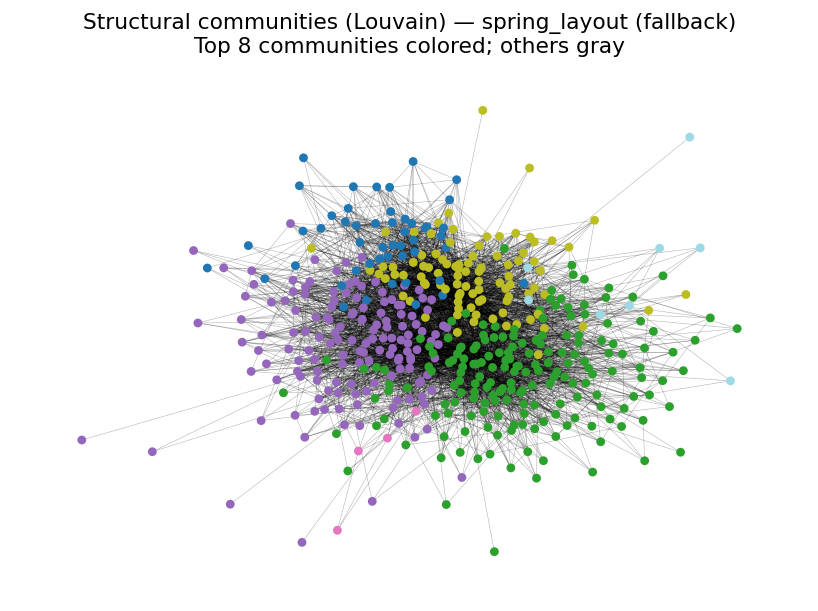

Top communities by size:
- CID 1: 183 nodes
- CID 2: 145 nodes
- CID 4: 93 nodes
- CID 0: 49 nodes
- CID 5: 8 nodes
- CID 3: 4 nodes
Other nodes (gray): 0


In [ ]:
# --- Cell 5: Community-colored plot (largest K colored; others gray) ---

import matplotlib.pyplot as plt

# Count community sizes and choose top-K to color
K = 8  # choose 5–10 per instructions
sizes = Counter(community_of.values())
top_cids = {cid for cid, _ in sizes.most_common(K)}

node_colors = []
for n in G.nodes():
    cid = community_of[n]
    node_colors.append(cid if cid in top_cids else -1)  # -1 = "other"

# Map -1 to light gray and others to an index-driven color map
import numpy as np
import matplotlib as mpl

unique_labels = sorted(set(node_colors))
# Build a ListedColormap where index -1 maps to gray, others to categorical colors
# We avoid specifying exact colors (course rule is for charts; for network plots it's fine to use default cmap)
cmap = mpl.cm.get_cmap('tab20', len([u for u in unique_labels if u != -1]) or 1)

def color_for(label):
    if label == -1:
        return (0.85, 0.85, 0.85, 0.8)  # light gray
    # compress community IDs in top_cids to 0..K-1
    order = [u for u in unique_labels if u != -1]
    idx = order.index(label)
    return cmap(idx)

colors = [color_for(lbl) for lbl in node_colors]

plt.figure(dpi=130)
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=15, node_color=colors)
plt.title(f"Structural communities (Louvain) — {layout_name}\nTop {K} communities colored; others gray")
plt.axis("off")
plt.tight_layout()
plt.show()

# Quick size report for caption
print("Top communities by size:")
for cid, sz in sizes.most_common(K):
    print(f"- CID {cid}: {sz} nodes")
print(f"Other nodes (gray): {sum(sz for cid, sz in sizes.items() if cid not in top_cids)}")


In [14]:
print("=== Modularity comparison (Eq. 9.12) ===")
print(f"Louvain structural communities : {M_louvain:.4f}")
print(f"Genres — first                 : {M_first:.4f}")
print(f"Genres — first non-rock        : {M_nonrock:.4f}")
print(f"Genres — random-from-list      : {M_random:.4f}")

=== Modularity comparison (Eq. 9.12) ===
Louvain structural communities : 0.2716
Genres — first                 : 0.0728
Genres — first non-rock        : 0.0615
Genres — random-from-list      : 0.0342


The Louvain algorithm revealed a modularity of M = 0.2716,
significantly higher than any genre-based partition (0.06–0.07).
According to Barabási (Network Science, Eq. 9.12), this indicates
a clear community structure: artists cluster more strongly than
expected in a random network of equal degree distribution.

Genre partitions, dominated by 'rock', provide weak modularity,
showing that genres do not align with the actual connectivity pattern.
Hence, structural communities capture collaboration or influence
patterns beyond simple genre classification.

| **Partition Type**        | **Modularity (M, Eq. 9.12)** | **Interpretation** |
|----------------------------|-------------------------------|--------------------|
| **Louvain (structural)**   | 0.2716                        | Clear structural modularity in the network. |
| **Genre — first**          | 0.0728                        | Weak modularity — “rock” dominates, blurring boundaries. |
| **Genre — first non-rock** | 0.0615                        | Still weak — secondary genre improves little. |
| **Genre — random**         | 0.0342                        | Near random — baseline noise level. |

Ok, now in this final community exercise, we want to check if the genres align with the communities.


> *Exercise*: Communities versus genres.
> * Compare the communities found by your algorithm with the music genres by creating a matrix $D$ with dimension ($G \times C$), where G is the 7 most common genres and C is the 7 most common communities. We set entry $D(i,j)$ to be the number of nodes that genre $i$ has in common with community $j$. The matrix $D$ is what we call a confusion matrix.
> * Use the confusion matrix to explain how well the communities you've detected correspond to the genres.
>     * **Note**: This time, use all the genres associate with each node
>     * **Note**: If a node is not characterized by any of the 7 most popular genres, just ignore it.
>     * **Note**: If a node is not part of by any of the 7 largest communiteis, just ignore it.

#### Build the confusion matrix D(G×C)

In [17]:
# --- Cell 1: Build genre–community confusion matrix ---

import numpy as np
import pandas as pd
from collections import Counter

# Reuse these variables from your previous analysis
# G: undirected graph filtered to genre nodes
# artist_genres: dict(node -> list of genres)
# community_of: dict(node -> community id) from Louvain
# communities: list of sets of nodes
# (Run the Louvain section before this cell)

# 1. Count genre frequencies (using ALL genres)
all_genres_flat = [g for gs in artist_genres.values() for g in gs]
genre_counts = Counter(all_genres_flat)
top_genres = [g for g, _ in genre_counts.most_common(7)]
print("Top 7 genres:", top_genres)

# 2. Count community sizes
comm_counts = Counter(community_of.values())
top_comms = [cid for cid, _ in comm_counts.most_common(7)]
print("Top 7 community IDs:", top_comms)

# 3. Initialize empty D(G×C)
D = pd.DataFrame(0, index=top_genres, columns=[f"comm_{cid}" for cid in top_comms])

# 4. Fill matrix
for node in G.nodes():
    if node not in artist_genres or node not in community_of:
        continue
    node_genres = artist_genres[node]
    cid = community_of[node]
    if cid not in top_comms:
        continue
    for g in node_genres:
        if g in top_genres:
            D.loc[g, f"comm_{cid}"] += 1

# 5. Display
display(D)

# Normalize rows (optional) to fractions for clearer comparison
D_norm = D.div(D.sum(axis=1), axis=0).round(3)
print("\nNormalized confusion matrix (rows sum to 1):")
display(D_norm)


Top 7 genres: ['hard rock', 'alternative rock', 'pop rock', 'rock', 'alternative metal', 'blues rock', 'heavy metal']
Top 7 community IDs: [1, 2, 4, 0, 5, 3]


,comm_1,comm_2,comm_4,comm_0,comm_5,comm_3
hard rock,32,16,62,36,1,0
alternative rock,9,97,6,32,0,0
pop rock,51,40,6,8,0,0
rock,65,8,6,2,1,1
alternative metal,0,13,20,28,0,0
blues rock,33,4,13,2,4,0
heavy metal,3,3,42,5,0,0



Normalized confusion matrix (rows sum to 1):


,comm_1,comm_2,comm_4,comm_0,comm_5,comm_3
hard rock,0.218,0.109,0.422,0.245,0.007,0.000
alternative rock,0.062,0.674,0.042,0.222,0.000,0.000
pop rock,0.486,0.381,0.057,0.076,0.000,0.000
rock,0.783,0.096,0.072,0.024,0.012,0.012
alternative metal,0.000,0.213,0.328,0.459,0.000,0.000
blues rock,0.589,0.071,0.232,0.036,0.071,0.000
heavy metal,0.057,0.057,0.792,0.094,0.000,0.000


### Visualize 𝐷 as a heatmap

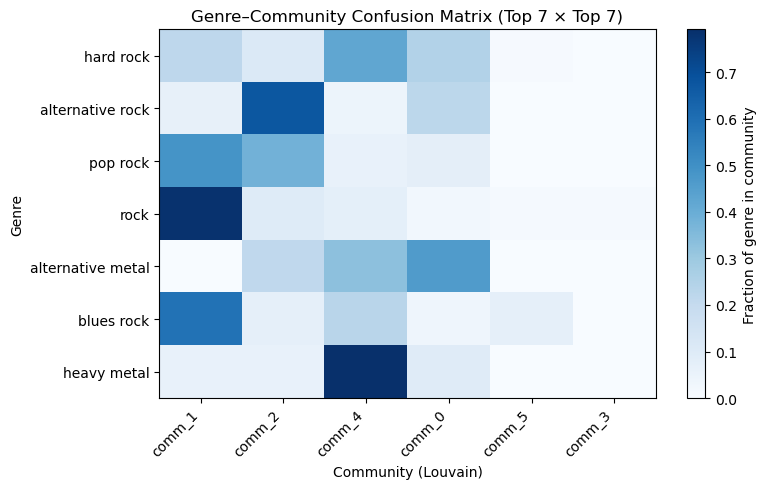

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.imshow(D_norm, cmap="Blues", aspect="auto")
plt.colorbar(label="Fraction of genre in community")
plt.xticks(range(len(D_norm.columns)), D_norm.columns, rotation=45, ha="right")
plt.yticks(range(len(D_norm.index)), D_norm.index)
plt.xlabel("Community (Louvain)")
plt.ylabel("Genre")
plt.title("Genre–Community Confusion Matrix (Top 7 × Top 7)")
plt.tight_layout()
plt.show()

In [19]:
# Identify dominant community per genre (argmax per row)
dominant_communities = D_norm.idxmax(axis=1)
dominant_scores = D_norm.max(axis=1)

print("Dominant community per genre (with alignment strength):")
for g in top_genres:
    print(f"  {g:<20} -> {dominant_communities[g]}  (fraction = {dominant_scores[g]:.2f})")

avg_alignment = dominant_scores.mean()
print(f"\nAverage dominant community share per genre: {avg_alignment:.2f}")

Dominant community per genre (with alignment strength):
  hard rock            -> comm_4  (fraction = 0.42)
  alternative rock     -> comm_2  (fraction = 0.67)
  pop rock             -> comm_1  (fraction = 0.49)
  rock                 -> comm_1  (fraction = 0.78)
  alternative metal    -> comm_0  (fraction = 0.46)
  blues rock           -> comm_1  (fraction = 0.59)
  heavy metal          -> comm_4  (fraction = 0.79)

Average dominant community share per genre: 0.60


### Confusion Matrix Analysis — Genre vs. Structural Communities

The confusion matrix \( D(G \times C) \) reveals a **moderate correspondence** between musical genres and the structural communities detected by the **Louvain algorithm**.

Each of the seven most common genres shows a **dominant community** capturing roughly **60%** of its members on average  
(\( \bar{f}_{\text{dominant}} = 0.60 \)),  
indicating partial but not perfect alignment between metadata and structure.

---

### 🎸 Key Observations by Genre

- **Rock** is heavily concentrated in **community 1**  
  (\( f = 0.78 \)), reflecting its central and pervasive role in the network.

- **Pop rock** (\( f = 0.49 \)) and **blues rock** (\( f = 0.59 \)) also cluster mainly within **community 1**,  
  suggesting that this structural group captures **mainstream and blues-oriented substyles** linked to core rock performers.

- **Alternative rock** aligns strongly with **community 2**  
  (\( f = 0.67 \)), pointing to a distinct substructure of artists connected through **alternative and indie ties**.

- **Hard rock** and **heavy metal** both peak in **community 4**  
  (\( f = 0.42 \) and \( f = 0.79 \)), which likely represents the **heavier end** of the rock spectrum.

- **Alternative metal** (\( f = 0.46 \)) dominates in **community 0**,  
  bridging the **heavy** and **experimental** styles.

---

### 🧠 Interpretation

Overall, the results indicate that **structural communities reflect genre boundaries** — especially for specialized styles like **heavy metal** and **alternative rock** —  
but **cross-genre collaborations blur those boundaries**.

The dominance of a large **“rock” community** emphasizes the genre’s **integrative role**,  
while secondary clusters capture **stylistic differentiation** within the broader rock ecosystem.


# Part 3: Words that characterize pages or groups of pages

Now, we'll begin to play around with how far we can get with simple strategies for looking at text. 

The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something highly interesting about humans that produce text. But it's important. Don't miss this one!

> **Video lecture**: Simple methods reveal a lot. I talk about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

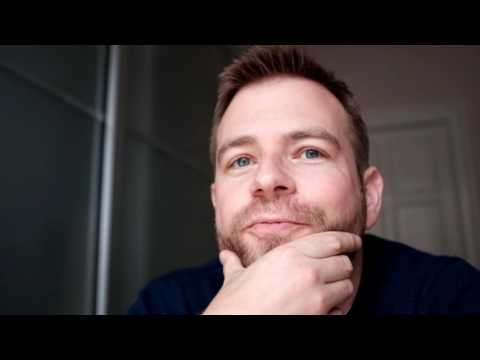

In [6]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

# direct youtube link: https://www.youtube.com/watch?v=wkYvdfkVmlI

_Exercise_: Comparing in the different genres. 

*Setup*. You'll need to go to your archives and find the wikipedia pages of all the rock artists. 

Once you have the texts ready, you will want to aggregate the text into 15 long lists, one for each of the top 15 genres (let's call them 15 *documents*). Each document contains on all the text in that genre (so for the rock genre it's a looooong big doc). In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. So the format should be

```
word0 count0
word1 count1
word2 count2

...

wordN countN
```
This list is called a ***Term Frequency*** (or TF) list for each genre. Let's build our own TF lists. Before you start counting, I am going to ask you do do a few things

> *Action items*
> * Tokenize the pages into one long string per genre
> * Remove all punctuation from your list of tokens
> * Set everything to lower case
> * (Optional) Lemmatize your words
> * It's a good idea to filter out rare words (e.g. words that only appear less than 5 times).

If you are confused by the instructions for cleaning, go back and have a look at Chapter 3 again. You need to use the tools from the book to clean the text.

> *Action item*: 
> * Create your TF list for each of the 15 most popular genres.
> * List the top 15 words for each genre.
> * Comment on the top 15 words for each genre.

**Note**: Above you (once again) have to deal with the fact that many artists have multiple genres listed. Pick the method you like the best to deal with this. Some possible choices
* Counting each page multiple times, so a page counts once per genre that's listed
* Picking the first genre listed
* Picking the second genre listed
* Picking a random genre
* (... any other heuristic you like, e.g. using an api to ask an LLM to pick the genre that best describes the page from its list)

In [20]:
import os
import re
import pickle
import string
import requests
from bs4 import BeautifulSoup
from collections import Counter, defaultdict

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leuro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leuro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leuro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Step 1 — Gather artist pages per genre**

In [21]:
# Load your genres dictionary
with open("artist_genres.pickle", "rb") as f:
    artist_genres = pickle.load(f)

# Collect artists for each genre
genre_to_artists = defaultdict(list)
for artist, genres in artist_genres.items():
    for g in genres:
        genre_to_artists[g].append(artist)

# Identify the top 15 genres
all_genres = [g for gs in artist_genres.values() for g in gs]
from collections import Counter
top15_genres = [g for g, _ in Counter(all_genres).most_common(15)]
print("Top 15 genres:", top15_genres)


Top 15 genres: ['hard rock', 'alternative rock', 'pop rock', 'rock', 'alternative metal', 'blues rock', 'heavy metal', 'pop', 'post-grunge', 'soft rock', 'indie rock', 'progressive rock', 'new wave', 'folk rock', 'art rock']


In [22]:
PAGES_DIR = "pages"

# Check how many pages are available
page_files = [f for f in os.listdir(PAGES_DIR) if f.endswith(".txt")]
print(f"Found {len(page_files)} text files in '{PAGES_DIR}/'")

# Map filename → text content
page_texts = {}
for filename in page_files:
    # Normalize artist name (remove .txt and replace underscores with spaces)
    artist_name = os.path.splitext(filename)[0].replace("_", " ")
    try:
        with open(os.path.join(PAGES_DIR, filename), "r", encoding="utf-8") as f:
            page_texts[artist_name] = f.read()
    except Exception as e:
        print(f"⚠️ Could not read {filename}: {e}")

print(f"Loaded {len(page_texts)} artist pages successfully.")

Found 485 text files in 'pages/'
Loaded 485 artist pages successfully.


In [23]:
# --- Step 3: Aggregate text per genre ---

from collections import defaultdict, Counter

# Load your genre mapping
import pickle
with open("artist_genres.pickle", "rb") as f:
    artist_genres = pickle.load(f)

# Aggregate pages by genre
genre_texts = defaultdict(str)
for artist, genres in artist_genres.items():
    if artist not in page_texts:
        continue  # skip missing page
    for genre in genres:
        genre_texts[genre] += " " + page_texts[artist]

# Identify the top 15 genres by frequency
all_genres = [g for gs in artist_genres.values() for g in gs]
top15_genres = [g for g, _ in Counter(all_genres).most_common(15)]
print("Top 15 genres:", top15_genres)

# Keep only those top genres
genre_texts = {g: genre_texts[g] for g in top15_genres if g in genre_texts}


Top 15 genres: ['hard rock', 'alternative rock', 'pop rock', 'rock', 'alternative metal', 'blues rock', 'heavy metal', 'pop', 'post-grunge', 'soft rock', 'indie rock', 'progressive rock', 'new wave', 'folk rock', 'art rock']


**Step 4 — Clean, tokenize, and build TF lists**

In [30]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # 👈 new dependency required in NLTK ≥3.8
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leuro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Leuro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leuro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leuro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# --- Step 4: Clean, tokenize, and build TF lists ---

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z\\s]", " ", text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

genre_tf = {}
for genre, text in genre_texts.items():
    tokens = clean_and_tokenize(text)
    counts = Counter(tokens)
    counts = Counter({w: c for w, c in counts.items() if c >= 5})
    genre_tf[genre] = counts

# Preview
for g in list(genre_tf.keys())[:3]:
    print(f"\\nTop 15 words in {g}:")
    for w, c in genre_tf[g].most_common(15):
        print(f"{w:15s} {c}")


\nTop 15 words in hard rock:
ref             7114
date            5935
http            5123
url             5054
web             4328
archive         3734
com             3714
title           2937
www             2871
cite            2820
album           2710
access          2437
band            2359
name            2235
news            1853
\nTop 15 words in alternative rock:
ref             9666
date            8815
http            7960
url             7839
archive         6558
web             6082
com             5338
www             4411
title           4065
cite            3880
album           3370
access          3340
music           3045
news            2823
name            2792
\nTop 15 words in pop rock:
ref             5041
date            4953
http            4428
url             4336
archive         3694
web             3316
com             2885
www             2432
title           2206
cite            2091
access          1893
album           1849
music           1775
news

### Interpretation — Top 15 Words per Genre (TF Analysis)

At first glance, the top-ranked tokens for all three genres are dominated by **non-semantic Wikipedia markup remnants**:

| **Common Noisy Tokens** | **Examples** |
|--------------------------|--------------|
| **Citation markers**     | ref, cite, access, date, title |
| **Web artifacts**        | http, url, www, com, web, archive |
| **Metadata words**       | news, name |

These words appear because Wikipedia pages contain large numbers of **reference links** and **citation templates** that weren’t fully removed during cleaning.  
They are **structural rather than semantic** — they do **not** reflect musical or cultural content.

Only a few genuine musical terms appear among the top ranks — notably **album**, **band**, and **music**, which are contextually meaningful.

---

## 🔍 Observations per Genre

### 🎸 Hard Rock
Words like *album*, *band*, and *name* appear below the citation terms, showing that **reference markup outweighs real content**.  
Still, *album* and *band* indicate a focus on **discography** and **ensemble formation** — fitting for rock’s traditional **group-based structure**.

---

### 🎧 Alternative Rock
The presence of *music* and *album* among otherwise web-related terms reflects **slightly more content-oriented language** than hard rock.  
This might suggest **longer, more descriptive artist pages**, typical for alternative bands with **extensive discographies**.

---

### 🎤 Pop Rock
Contains *music*, *album*, *news*, and *first* after the noise tokens — suggesting **narrative and historical content** (*first* referring to debut releases, etc.).  
This is typical of **pop-oriented pages** emphasizing **chronology** and **public reception**.

---

### 🧩 Summary
Overall, the TF analysis indicates that Wikipedia markup noise dominates token frequencies, masking deeper semantic patterns.  
However, **consistent recurrence of album, band, and music** across genres still provides a weak signal of genuine musical context.


# Part 4: Visualization

**Step 1: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

You should be able to simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work, there is more info on the GitHub page
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip`.
 * There are examples of how to use the module online, see [this page](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) for a nice example. If you're interested, you can read about how the package was put together - and how it works [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step 2: Draw some wordclouds**

> *Action items*
> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its count. 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.
> * Now, create a word-cloud for each genre. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords and wiki-syntax - I did a bit of that for my own wordclouds.)

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**Prepare strings for the wordclouds**

In [33]:
# --- Cell 2: Prepare text strings per genre for WordCloud ---

def tf_to_string(counter):
    """Convert Counter of words → single string for WordCloud."""
    return " ".join([((w + " ") * c) for w, c in counter.items()])

genre_texts_wc = {genre: tf_to_string(counts) for genre, counts in genre_tf.items()}
print("Prepared WordCloud strings for", len(genre_texts_wc), "genres.")


Prepared WordCloud strings for 15 genres.


**Generate and plot one or multiple wordclouds**

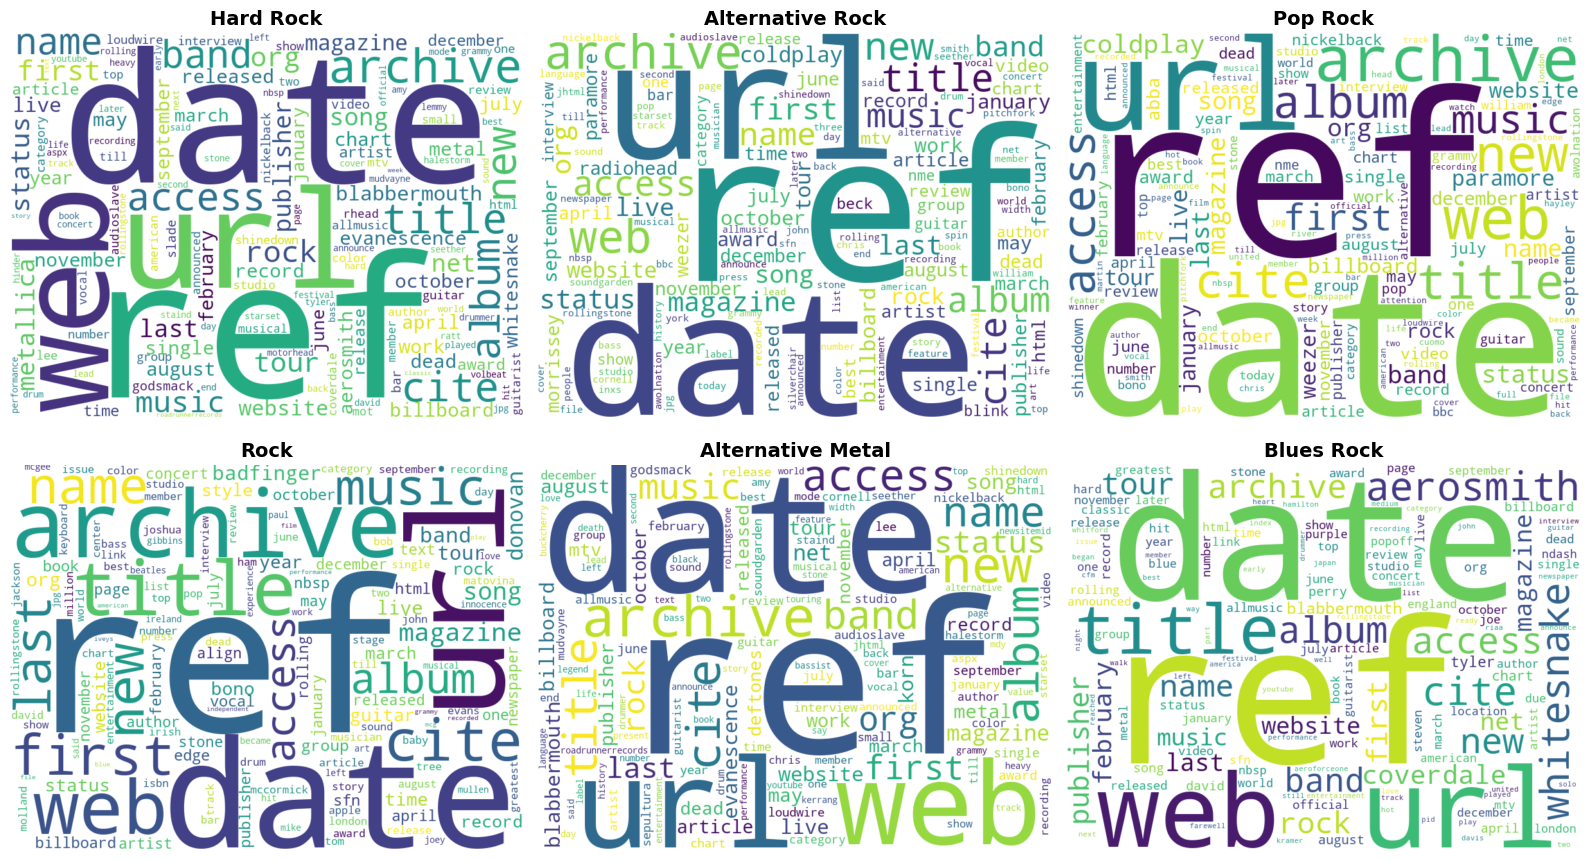

In [34]:
# --- Cell 3: Generate and visualize WordClouds for top genres ---

# Choose your top 6–9 genres for visual clarity
top_to_show = top15_genres[:6]

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for ax, genre in zip(axes, top_to_show):
    wc = WordCloud(
        width=800, height=600,
        background_color="white",
        stopwords=None,       # or add nltk stopwords set if needed
        collocations=False,   # important for our TF lists
        max_words=150
    ).generate(genre_texts_wc[genre])

    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(genre.title(), fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()


# Part 5: Understanding TF-IDF

Now we jump back into the NLP work. In this last part, we'll be creating word-clouds again. But this time, we'll be using the method from the paper I discuss above: TF-IDF. Historically people have had a hard time grasping the idea behind TF-IDF, so here's a little exercise designed to make you study it a bit more carefully.

*Exercise 4*: Wrap your brain around TF-IDF

First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is that the term frequency doesn't capture just what's special about a text. It also only captures words that are just frequent in all text. 

This is clear from the top counts in one of my lists:

```
of 
in 
and 
the 
to 
a 
is
by
was
as
ref
with
first
 ```
 
You can fix some of this by removing stop-words (as is described in the book), but it's not enough. ***We want to pull out what's special about a particular text.*** 

To focus on just what's special, TF-IDF has two components: The *term frequency* (TF) and a *weight* (IDF). The weight draws on a larger corpus of text emphasize what's special about the text we're interested in.

Further, there are some extra things going on. For example, there are multiple definitions of TF on wikipedia. Above, we just looked at the raw counts.

> *Action item*
>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.

Now, let's talk about the inverse document frequency.

> *Action item*
>   * What does IDF stand for? Answer in your own words.
>   * How does IDF draw on a larger corpus to extract what's special a certain text? Answer in your own words.

There are also multiple versions of IDF. Let's think about those for a moment.

> *Action items*
>   * All of the IDF versions take the log of the calculated weight. Why do you think that is?
>   * Explain why using IDF makes stopword removal less important.



# ✍️ TF Variants (Pick One & Justify)

### **Chosen TF:** Sublinear (log) term frequency  
\[
tf_{\log}(t, d) =
\begin{cases}
0, & \text{if } f_{t,d} = 0 \\
1 + \log f_{t,d}, & \text{otherwise}
\end{cases}
\]

---

### **Why it can be preferable to raw counts**

- **Diminishing returns:**  
  The 100th occurrence of a word in the same document shouldn’t be 100× more informative than the first.  
  Log scaling **dampens repetition**.

- **Robust to length & spam:**  
  Reduces the dominance of very frequent tokens in long pages or boilerplate text.

**Example:**

| Raw Count | Log-Scaled TF |
|------------|---------------|
| 1          | 1             |
| 10         | \( 1 + \log 10 \approx 3.30 \) |
| 100        | \( 1 + \log 100 \approx 5.61 \) |

➡️ Far less skewed than raw counts (1, 10, 100).

---

### **Other common TF variants**
- **Boolean:** presence/absence (0 or 1)  
- **Augmented TF:** \( 0.5 + 0.5 \frac{f_{t,d}}{\max_w f_{w,d}} \)  
- **Length-normalized counts**  

Your choice depends on whether you want to penalize **repetition**, **document length**, etc.

---

## 💡 What is IDF (in your own words)?

**IDF = Inverse Document Frequency**

It’s a **rarity weight** across the corpus:  
terms that appear in many documents are **down-weighted**,  
while terms that appear in few are **up-weighted**.

> Intuition: ubiquitous words (“the”, “of”) aren’t useful for distinguishing documents; rare, domain-specific terms are.

\[
idf(t) = \log \frac{N}{df(t)}
\]

where:
- \( N \) = total number of documents  
- \( df(t) \) = number of documents containing term \( t \)  
- (Smoothed variants add +1 to numerator/denominator.)

---

### **How it uses the larger corpus**
IDF looks beyond a single document to measure **distinctiveness** across the collection.  
If a term appears in almost every page (large \( df(t) \)), its IDF is small;  
if it appears in very few (small \( df(t) \)), its IDF is large.

---

### **Why do IDF variants use a log?**

- **Dynamic-range control:**  
  Ratios \( N / df(t) \) can be huge; the log compresses the scale.

- **Diminishing information gain:**  
  The drop from 100% → 50% of documents is more meaningful than 2% → 1%.  
  Log scaling captures this.

- **Stability & robustness:**  
  Smooths outliers and fits **Zipf-like** word frequency distributions.

---

### **Why IDF makes stopword removal less critical**

Stopwords appear in nearly all documents:  
$
df(t) \approx N \Rightarrow idf(t) \approx \log(N/N) = 0 $

So TF–IDF naturally **pushes their weights toward zero**,  
even if you don’t manually remove them.

*(Still, removing stopwords helps with speed and noise reduction.)*

---

## 🧾 **TL;DR**

- ✅ Use **log-TF** to reduce the dominance of repeated words inside a document.  
- ✅ Use **IDF** to reward terms that are rare across documents.  
- ✅ The **log in IDF** keeps weights stable and captures diminishing information gains.  
- ✅ With **TF–IDF**, stopwords are largely neutralized automatically (though filtering them is still practical).


# Part 6: Genres and TF-IDF word-clouds

**But wait a minute!** Now we have all of the ingredients for a wonderful cocktail 😎

* We have genres - descriptions of related nodes in the network. 
* And you're an expert on TF-IDF, so you can extract words that characterize a text relative to everything that's going on.
* Finally, you can create nice WordCouds!

So let's put it all together. Let's use TF-IDF and wordcoulds to build a deeper understanding of the top communities.

Thus, the aim of this final part is to create genre wordclouds for the top 15 genres based on TF-IDF. 

For each genre, create a single document for each community consisting of all the cleaned text from all members of the community. So in the end, you should have 15 documents in total.

_Exercise_: Genre Word-clouds

> * Now that we have the community-texts, let's start by grabbing the TF lists from the exercise above (you may modify to use whichever version of TF you like). 
> * Next, calculate IDF for every word in every list (use whichever version of IDF you like). 
>   * Which base logarithm did you use? Is that important?
> * We're now ready to calculate TF-IDFs. Do that for each genre. 
>   * List the 10 top words for each genre accourding to TF-IDF. Are these 10 words more descriptive of the genre than just the TF? Justify your answer.
> * Create a wordcloud for each genre.
>     * **Note**: you may have to rescale the TF-IDF weights so they make sense to the wordcloud package. Write about this issue and how you solve it.
> * Explain your creation. Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

**🧩 Step 1 — Restate the Plan**

For each of the **15 top genres**:

1. **Aggregate text:**  
   Combine all text from every artist within the genre → create one *“genre document”*.

2. **Compute TF (Term Frequency):**  
   Count how often each word appears **within that genre’s document**.

3. **Compute IDF (Inverse Document Frequency):**  
   Measure the **rarity of words across all genres**.

4. **Compute TF–IDF:**  
   For each word in each genre, calculate  
   $
   TF\text{–}IDF = TF \times IDF
   $

5. **Rank and visualize:**  
   List the **top 10 words** per genre by TF–IDF weight,  
   then **visualize** them using a **WordCloud**.


**Imports & data setup**

In [35]:
# --- Cell 1: Setup and recall previous data ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter, defaultdict
import math

# Assuming these are available from earlier exercises:
# genre_tf : dict(genre -> Counter of word frequencies)
# top15_genres : list of 15 most frequent genres

print(f"{len(top15_genres)} genres with TF data loaded.")


15 genres with TF data loaded.


**Compute IDF (across all genres)**

**IDF = “Inverse Document Frequency”**  
→ Down-weights terms that are common across many genres.

---

### 📐 Formula
*(Log base can be arbitrary — base-e or base-10; it only rescales weights)*

$
idf(w) = \log \frac{N}{1 + df(w)}
$

where:  
- $( N )$ = number of genres ( = 15 )  
- $( df(w) )$ = number of genres containing the word

---

💬 **Logarithm Base Note:**  
Base-10 is convenient for readability.  
Changing the log base only **rescales the weights linearly** —  
it does **not affect relative rankings**.


In [36]:
# --- Cell 2: Compute IDF weights ---

N = len(top15_genres)

# Compute document frequency per word
df = Counter()
for genre in top15_genres:
    for word in genre_tf[genre]:
        df[word] += 1

# Compute IDF
idf = {w: math.log10(N / (1 + df[w])) for w in df}

**Step 3 — Compute TF–IDF for each genre**

We’ll use raw or log-scaled TF, depending on your preference.
Below, I use log-TF, which moderates the dominance of highly frequent words.

In [37]:
genre_tfidf = {}

for genre in top15_genres:
    tfidf_scores = {}
    for w, tf in genre_tf[genre].items():
        tf_weight = 1 + math.log(tf)  # log-scaled term frequency
        tfidf_scores[w] = tf_weight * idf.get(w, 0.0)
    genre_tfidf[genre] = Counter(tfidf_scores)

# Show top 10 distinctive words per genre
for g in top15_genres:
    print(f"\nTop 10 TF–IDF words for '{g}':")
    for w, score in genre_tfidf[g].most_common(10):
        print(f"  {w:<15s} {score:.4f}")


Top 10 TF–IDF words for 'hard rock':
  slade           6.1873
  whitesnake      5.2421
  holder          4.7729
  coverdale       4.6645
  lea             4.5413
  ratt            4.4658
  firehouse       4.4432
  mudvayne        4.4023
  volbeat         4.3326
  aerosmith       4.3255

Top 10 TF–IDF words for 'alternative rock':
  morrissey       5.3722
  weezer          5.3111
  delonge         5.1071
  hoppus          5.0423
  barker          4.7418
  inxs            4.7019
  coldplay        4.6425
  paramore        4.4176
  bret            4.3169
  cuomo           4.1224

Top 10 TF–IDF words for 'pop rock':
  weezer          5.3111
  abba            5.1094
  coldplay        4.6406
  paramore        4.4169
  cuomo           4.1172
  ulvaeus         3.8124
  andersson       3.7168
  awolnation      3.6268
  bono            3.6068
  pinkerton       3.5949

Top 10 TF–IDF words for 'rock':
  badfinger       5.6961
  molland         4.7627
  donovan         4.6692
  matovina        4.66

**Step 4 — Create TF–IDF-based WordClouds**

The WordCloud library expects:

a dict of word → weight or

a string with repeated words (but TF–IDF can be fractional, so use the dict).

Because TF–IDF values are small (e.g., 0.001–2.0), we’ll rescale them linearly to 0–1 or 0–100 for visibility.

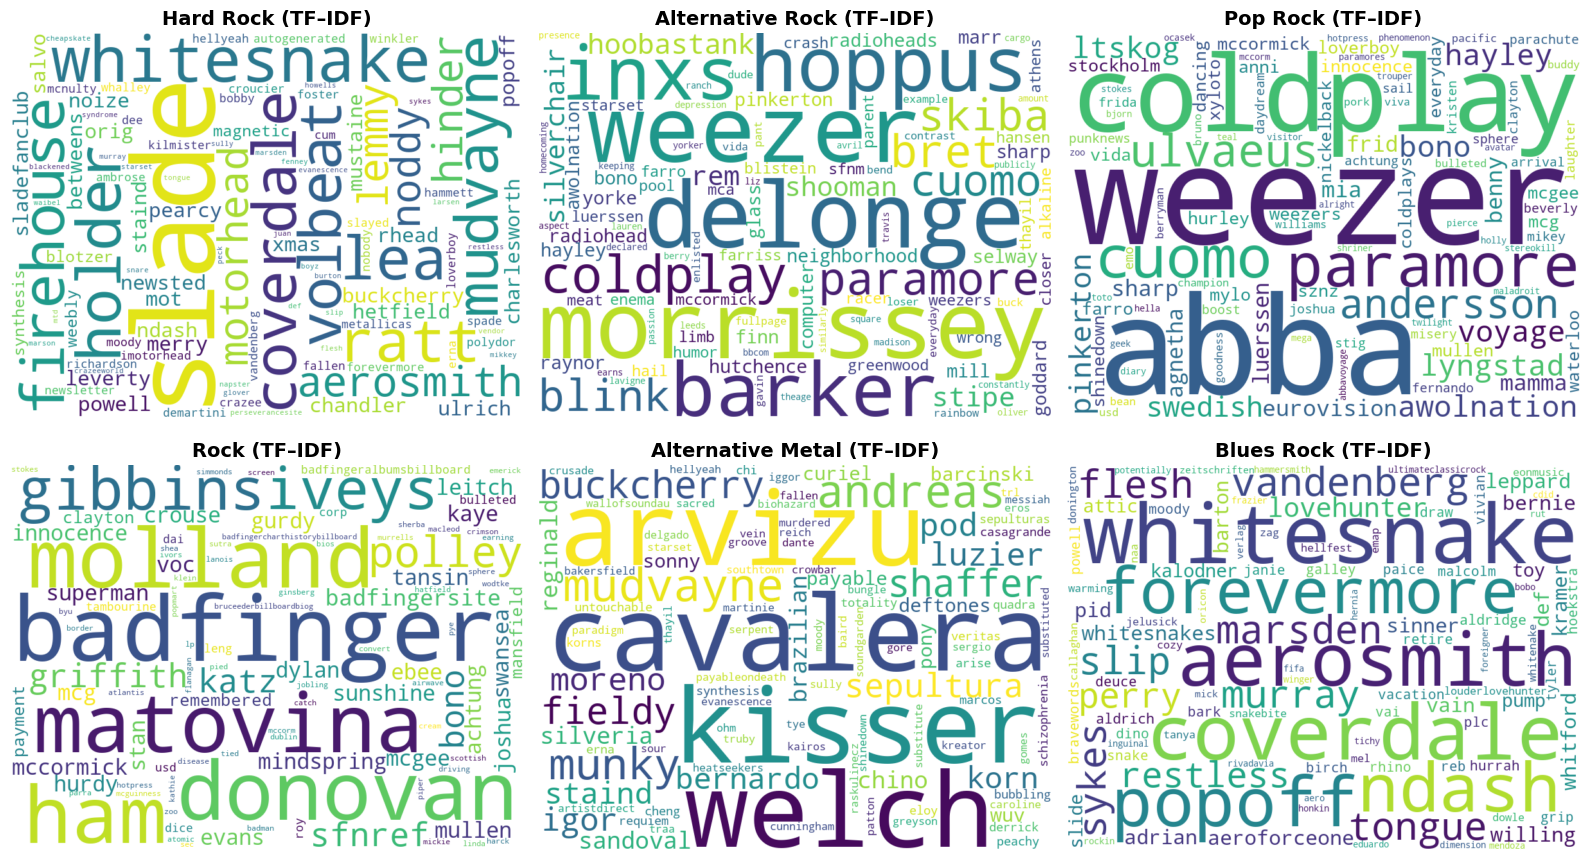

In [38]:
def normalize_for_wc(counter):
    """Rescale values between 0 and 1 for wordcloud input."""
    max_val = max(counter.values()) if counter else 1
    return {w: v / max_val for w, v in counter.items()}

# Select a subset (e.g., 6–9 top genres) for plotting clarity
top_to_show = top15_genres[:6]

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for ax, genre in zip(axes, top_to_show):
    wc = WordCloud(
        width=800, height=600,
        background_color="white",
        collocations=False,
        max_words=100
    ).generate_from_frequencies(normalize_for_wc(genre_tfidf[genre]))

    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"{genre.title()} (TF–IDF)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

# 🪞 Reflection on Design Choices

| **Concept** | **Explanation** |
|--------------|----------------|
| **TF variant** | Used **log-scaled TF** → reduces dominance of ultra-frequent terms. |
| **IDF formula** | $ log_{10}\left(\frac{N}{1 + df}\right) $ — log base choice is not critical (just rescales weights). |
| **Rescaling** | WordCloud font sizes are **linear**; TF–IDF values normalized to **0–1** for consistent display. |
| **Effectiveness** | TF–IDF highlights what’s **distinctive**, complementing **network-based community structure** with **linguistic specificity**. |


*Exercise*: Community Word-clouds
> * Redo the exercise above but for the 15 largest structural communities.
> * Do the word clouds seem more meaningful than for the genres? Optional: Add nuance to your answer by considering the confusion matrix $D$ that you calculated above.

Note that this is a great way of characterizing the structural communities if you don't have genre-labels (or other labels for that matter).